In [1]:
import numpy as np
import astropy.units as u
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
from astropy.io import fits
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import statistics as pystats
from matplotlib import pyplot
from scipy.optimize import curve_fit
from astropy.modeling import models, fitting
from deproject import deproject, get_galaxy_specs
from astropy.utils.data import get_pkg_data_filename
from reproject import reproject_interp
from scipy import stats

In [6]:
# open fits file
# galaxy = 'ngc0628'
galaxy = 'ngc1566'
# hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/hlsp_phangs_jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')[1]
hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')[1]
#hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w1_mjysr.fits')[0]
# hdu_galaxy2 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w2_mjysr.fits')[0]
# hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac1_gauss3.fits')[0]
# hdu_galaxy2 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac2_gauss3.fits')[0]
# hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w1_mjysr.fits')[0]
hdu_galaxy2 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w2_mjysr.fits')[0]
# hdu_galaxy = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac1_gauss3.fits')[0]
# hdu_galaxy2 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac2_gauss3.fits')[0]

# set up coordinate grid for data in fits file
wcs_im = WCS(hdu_galaxy.header)
wcs_im2 = WCS(hdu_galaxy2.header)

In [7]:
# here's what the header looks like
# this is the best place to confirm what the units are how your data was processed
hdu_galaxy.header
hdu_galaxy2.header

SIMPLE  =                    T / Written by IDL:  Sat Jun 18 09:19:12 2022      
BITPIX  =                  -64 /  IEEE double precision floating point          
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  655 / length of data axis 1                          
NAXIS2  =                  655 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
CTYPE1  = 'RA---TAN'           / TANgent plane                                  
CTYPE2  = 'DEC--TAN'           / TANgent plane                                  
CRVAL1  =            65.001587 / Reference RA                                   
CRVAL2  =           -54.938011 / Reference Dec                                  
CRPIX1  =                 32

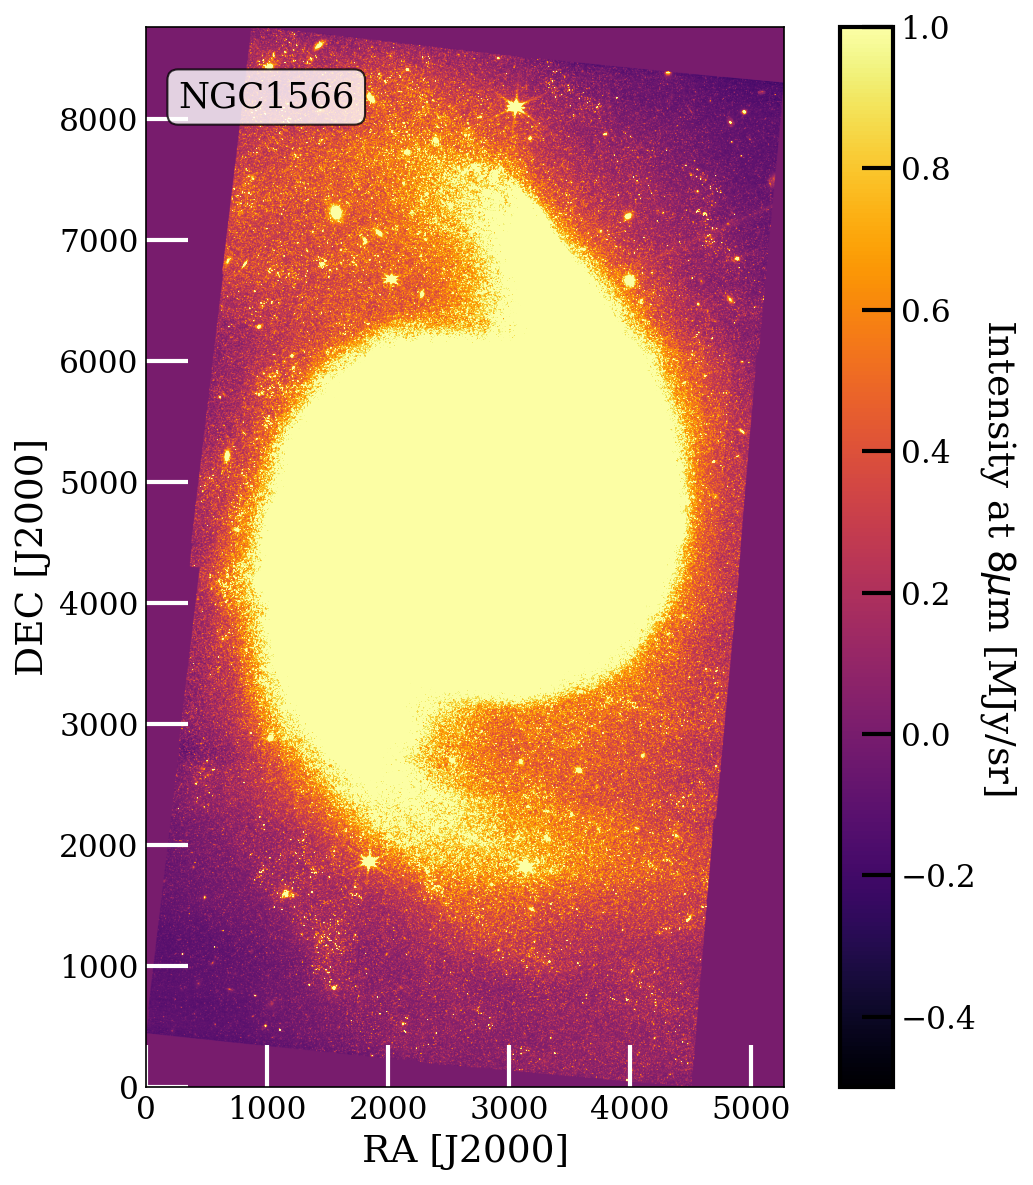

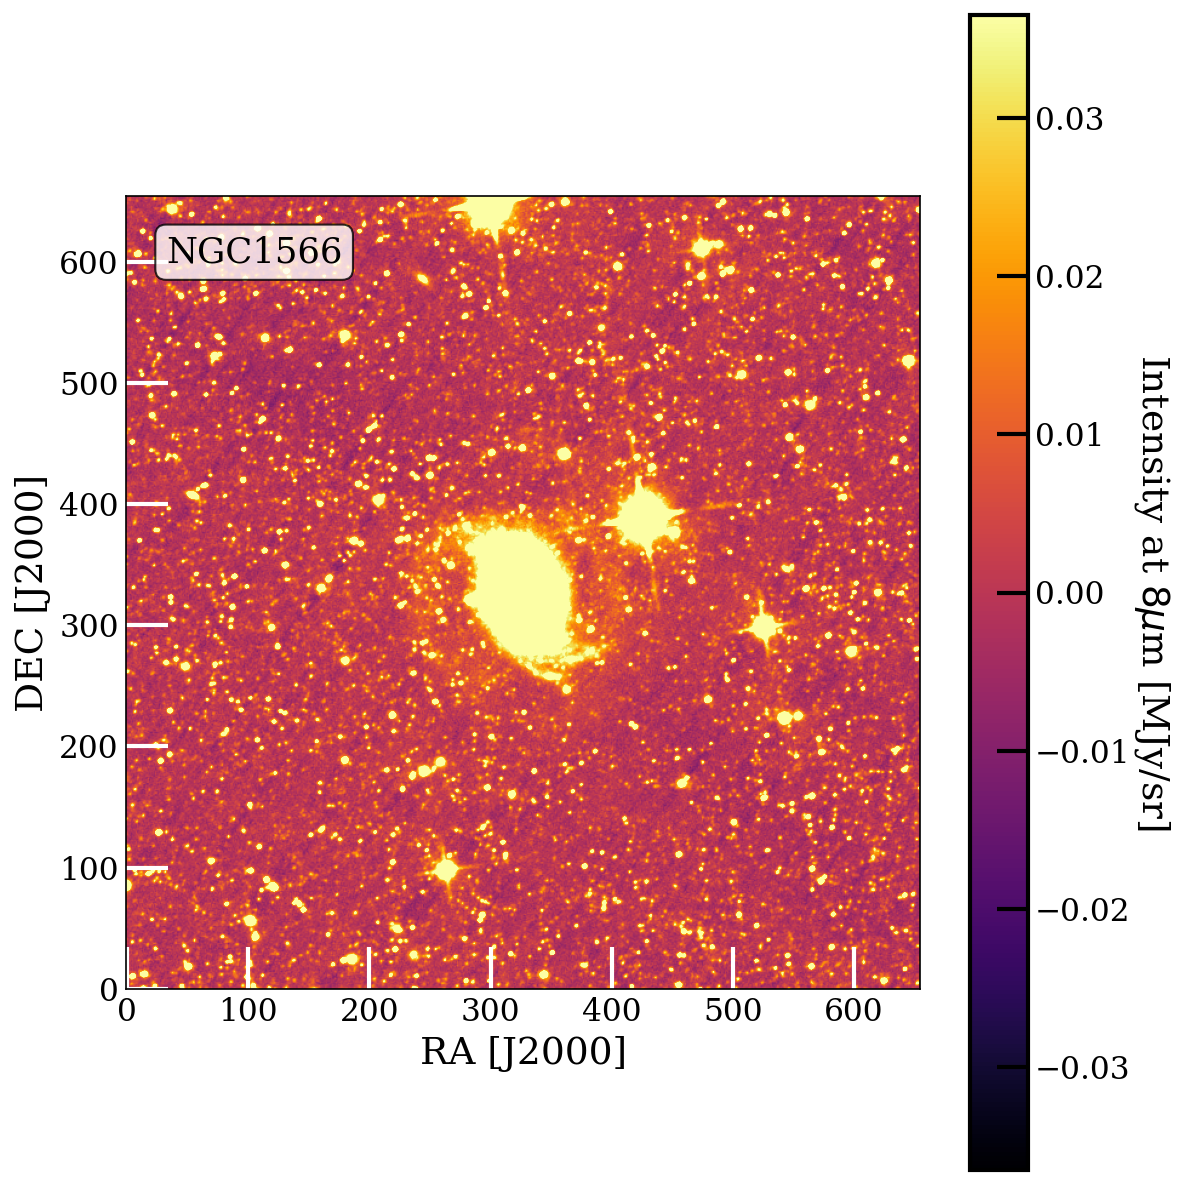

In [9]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot() #projection=wcs_im

# display fits image
im = ax.imshow(hdu_galaxy.data, origin='lower', norm=mpl.colors.Normalize(vmin=-0.5, vmax=1), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, galaxy.upper(), transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot() #projection=wcs_im

# display fits image
im = ax.imshow(hdu_galaxy2.data, origin='lower', norm=mpl.colors.Normalize(vmin=-0.03652506055705085, vmax=0.03652506055705085), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, galaxy.upper(), transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

In [ ]:
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w1_mjysr.fits')
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac1_gauss3.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w1_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac1_gauss3.fits')

bins0628w1 = np.linspace(-0.01,0.01,1000)

bin_heights, bin_borders = np.histogram(image_data, bins=bins0628w1)
bin_widths = np.diff(bin_borders)
bin_centers = bin_borders[:-1] + bin_widths / 2

t_init = models.Gaussian1D()
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, bin_centers, bin_heights)

x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 10000)
plt.figure()
plt.bar(bin_centers, bin_heights, width=bin_widths, label='histogram')
plt.plot(x_interval_for_fit, t(x_interval_for_fit), label='fit', c='red')
plt.legend()

In [ ]:
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w2_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac2_gauss3.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w2_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac2_gauss3.fits')
bins0628w2 = np.linspace(-0.02,0.02,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w2)

In [ ]:
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w3_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac3_gauss4.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w3_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac3_gauss4.fits')
bins0628w3 = np.linspace(-0.2,0.2,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w3)

In [ ]:
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_w4_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc0628_irac4_gauss4.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_w4_mjysr.fits')
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/ngc1566_irac4_gauss4.fits')
bins0628w4 = np.linspace(-0.5,0.5,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w4)

In [ ]:
# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')
bins0628w4 = np.linspace(-0.01,0.01,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w4)

In [ ]:
RA, DEC, POSANG, INCL, DIST = get_galaxy_specs(galaxy) # DIST [Mpc]

In [ ]:
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits')[0]
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits')[0]

# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits')[0]
# hdu_galx = fits.open('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits')[0]

# hdu_galx = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')[1]
hdu_galx = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')[1]
mask = hdu_galx.data == 0
hdu_galx.data[mask] = np.nan
wcs_galx = WCS(hdu_galx.header)
wcs_galx.sip = None

deproj_img = deproject(center_coord=(RA*u.deg, DEC*u.deg), incl=INCL*u.deg, pa=POSANG*u.deg,
                           header=hdu_galx.header, wcs=None, naxis=None, ra=None, dec=None,
                           return_offset=False)
r_deg = deproj_img[0]
r_pc = r_deg * (np.pi / 180) * (DIST * 1e6) # in pc
# data = hdu_galx.data.flatten() * np.cos(INCL*np.pi/180)
# radii = r_pc.flatten()

# image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')
image_data = fits.getdata('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')
mask = image_data == 0
image_data[mask] = np.nan
bins0628w4 = np.linspace(0, 5,1000)
histogram = plt.hist(image_data.flatten(), bins=bins0628w4)

In [ ]:
plt.imshow(r_pc)

In [ ]:
# mask = (r_pc > 5*1e3)
mask = (r_pc < 50*1e3)
masked = r_pc
masked[~mask] = np.nan
plt.imshow(masked)
dir = '/Users/Brandon Lam/galaxies/'
plt.savefig(dir + '/figs/' + '.png')

In [ ]:
image = fits.getdata(dir+'/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits')
# image = fits.getdata(dir+'/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits')
# image = fits.getdata(dir+'/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits')
# image = fits.getdata(dir+'/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits')

#for i in mask:
#    if (mask[i] == 0):
#        image[i] = np.nan
plt.imshow(image, vmin=-0.01*np.nanmin(image), vmax=0.001*np.nanmax(image))
plt.imshow(r_pc)

In [ ]:
# start a figure
f = plt.figure(figsize=(8, 8))
# set up a subplot with coordinate information from fits file header
ax = plt.subplot()
wcs_im1 = WCS(hdu_galx.header)

# mask
mask = r_pc < 23 * 1e3
galx = hdu_galx.data
ax=plt.subplot(projection=wcs_im1)
galx[mask] = np.nan

# display fits image
im = ax.imshow(hdu_galx.data, origin='lower', norm=mpl.colors.Normalize(vmin=-0.03652506055705085, vmax=0.03652506055705085), aspect='equal', cmap='inferno', alpha=1)

# everything that comes after this point is to make the figure look prettier; 
# strictly speaking, these aren't necessary
plt.rcParams["font.family"] = "serif"
mpl.rcParams['text.usetex'] = False

f.set_dpi(150)
f.set_facecolor('w')
ax.set_facecolor('k')
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
ax.text(0.05, 0.95, 'NGC0628', transform=ax.transAxes, fontsize=17,
                verticalalignment='top', bbox=props, zorder=11)
ax.set_xlabel('RA [J2000]', fontsize=18)
ax.set_ylabel('DEC [J2000]', fontsize=18)
ax.tick_params(axis='both', which='major', direction='in', color='white', length=20, width=2, labelsize=15)

# set up colorbar
cmap = mpl.cm.inferno
normalize = mpl.colors.LogNorm(vmin=1e-1, vmax=1e2)
cbar = f.colorbar(im, ax=ax)
cbar.set_label('Intensity at $8 \mu$m [MJy/sr]', rotation=270, fontsize=18, labelpad=20)
cbar.ax.tick_params(direction='in', which='both', labelsize=15)
cbar.ax.tick_params(which='major', length=15, width=2)
cbar.ax.tick_params(which='minor', length=5, width=1)
plt.setp(cbar.ax.spines.values(), linewidth=2)

f.tight_layout()

In [ ]:
# hdu1 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc0628_f200w_v1p1_img.fits')[1]
hdu1 = fits.open('C:/Users/Brandon Lam/Galaxies/' + galaxy.lower() + '/hlsp_phangs-jwst_jwst_nircam_ngc1566_f200w_v1p1_img.fits')[1]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_irac1_gauss3.fits'))[0]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc0628/'+galaxy.lower()+'_w1_mjysr.fits'))[0]
# hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_irac1_gauss3.fits'))[0]
hdu2 = fits.open(get_pkg_data_filename('/Users/Brandon Lam/galaxies/ngc1566/'+galaxy.lower()+'_w1_mjysr.fits'))[0]

In [ ]:
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-0.5, vmax=1)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('irac1')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu2.header))
ax2.imshow(hdu2.data, origin='lower', vmin=-0.03652506055705085, vmax=0.03652506055705085)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1')

In [ ]:
array, footprint = reproject_interp(hdu2, hdu1.header)
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(array, origin='lower', vmin=-0.03652506055705085, vmax=0.03652506055705085)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('Reprojected w1')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu1.header))
ax2.imshow(footprint, origin='lower', vmin=0, vmax=1.5)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1 footprint')

In [ ]:
fits.writeto('w1_on_irac_header.fits', array, hdu1.header, overwrite=True)

In [ ]:
hdu3 = fits.open(get_pkg_data_filename('w1_on_irac_header.fits'))[0]

In [ ]:
ax1 = plt.subplot(1,2,1, projection=WCS(hdu1.header))
ax1.imshow(hdu1.data, origin='lower', vmin=-0.5, vmax=10)
ax1.coords['ra'].set_axislabel('Right Ascension')
ax1.coords['dec'].set_axislabel('Declination')
ax1.set_title('jwst')

ax2 = plt.subplot(1,2,2, projection=WCS(hdu3.header))
ax2.imshow(hdu3.data, origin='lower', vmin=-0.5, vmax=10)
ax2.coords['ra'].set_axislabel('Right Ascension')
ax2.coords['dec'].set_axislabel('Declination')
ax2.coords['dec'].set_axislabel_position('r')
ax2.coords['dec'].set_ticklabel_position('r')
ax2.set_title('w1')
plt.savefig(dir + '/figs/comparison.png')   

In [ ]:
dir = '/Users/Brandon Lam/galaxies/' # directory containing folders containing galaxy fit files
galaxy = 'ngc1566' # name of folder(s) to look in
w1 = fits.getdata(dir + galaxy + '/hlsp_phangs-jwst_jwst_nircam_' + galaxy +'_f200w_v1p1_img.fits')
# w1 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac1_gauss3.fits')
# w1 = fits.getdata(dir + galaxy + '/' + galaxy +'_w1_mjysr.fits')
w1 = w1.flatten()

w2 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac2_gauss3.fits')
# w2 = fits.getdata(dir + galaxy + '/' + galaxy +'_w2_mjysr.fits')
w2 = w2.flatten()

w3 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac3_gauss4.fits')
# w3 = fits.getdata(dir + galaxy + '/' + galaxy +'_w3_mjysr.fits')
w3 = w3.flatten()

w4 = fits.getdata(dir + galaxy + '/' + galaxy +'_irac4_gauss4.fits')
# w4 = fits.getdata(dir + galaxy + '/' + galaxy +'_w4_mjysr.fits')
w4 = w4.flatten()

In [ ]:
# vars to edit
saveFigs = True
saveStats = True # save histograms stats like mean, median, mode
saveDir = dir # this will save figures to the root directory of galaxies folder in folder called 'figs' - change this if you want it saved elsewhere
color_w1 = 'blue'
color_w2 = 'red'
color_w3 = 'green'
color_w4 =  'purple'
minclip = -.1
maxclip = .1
bincount = 1000
figx = 8
figy = 8
xlabel = 'Values'
ylabel = 'Frequency'

# You should not have to change anything past this point to get the script working correctly

# make directory to store figs if it doesn't exist
if (saveFigs or saveStats):
    if (not os.path.isdir(dir + '/figs/')):
        os.mkdir(dir + '/figs/')

# open/create text file to store histogram statistics
if (saveStats == True):
    if (not os.path.isfile(dir + '/figs/stats.txt')):
        statsFile = open(dir + '/figs/stats.txt', 'x')
    else:
        statsFile = open(dir + '/figs/stats.txt', 'a')
        
# function to save figs
def saveFig(wise):
    plt.savefig(dir + '/figs/' + wise + '.png')   
       
# function to calculate mean, median, mode and print to file
def calcMMM(wdata, wise):
    mean = pystats.mean(wdata)
    meanString = "\nMean of " + wise + ": " + str(mean)
    print(meanString)
    median = pystats.median(wdata)
    medianString = "\nMedian of " + wise + ": " + str(median)
    print(medianString)
    mode = pystats.mode(wdata)
    modeString = "\nMode of " + wise + ": " + str(mode)
    print(modeString)
    if (saveStats == True):
        statsFile.write(meanString)
        statsFile.write(medianString)
        statsFile.write(modeString)
        statsFile.write('\n')

def createFig1(data, figx, figy, xlabel, ylabel, bins, color, wise):
    f = plt.figure(figsize=(figx, figy))
    Y, BE = np.histogram(data, bins=bins)
    X = BE[:-1]
    plt.plot(X, Y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)
    return X, Y

def createFig2(X_data1, Y_data1, X_data2, Y_data2, figx, figy, xlabel, ylabel, bins, color1, color2, wise):
    f = plt.figure(figsize=(figx, figy))
    #Y_1, BE_1 = np.histogram(data1, bins=bins)
    #Y_2, BE_2 = np.histogram(data2, bins=bins)
    #X_1 = BE_1[:-1]
    #X_2 = BE_2[:-1]
    plt.plot(X_data1, Y_data1, color=color1)
    plt.plot(X_data2, Y_data2, color=color2)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(wise)
    if (saveFigs == True):
        saveFig(wise)

# all figures use same bin count, setting it here to be constant
bins=np.linspace(minclip, maxclip, bincount)

# making histograms, figures
# w1
X_w1, Y_w1 = createFig1(w1, figx, figy, xlabel, ylabel, bins, color_w1, "w1")
# Calculate mean, median, mode, and save the figure
calcMMM(w1, 'w1')

# w2
X_w2, Y_w2 = createFig1(w2, figx, figy, xlabel, ylabel, bins, color_w2, "w2")
calcMMM(w2, 'w2')

# w3
X_w3, Y_w3 = createFig1(w3, figx, figy, xlabel, ylabel, bins, color_w3, "w3")
calcMMM(w3, 'w3')

# w4
X_w4, Y_w4 = createFig1(w4, figx, figy, xlabel, ylabel, bins, color_w4, "w4")
calcMMM(w4, 'w4')

# Plotting W1 against W2
createFig2(X_w1, Y_w1, X_w2, Y_w2, figx, figy, xlabel, ylabel, bins, color_w1, color_w2, "w1w2")

# Plotting W3 against W4
createFig2(X_w3, Y_w3, X_w4, Y_w4, figx, figy, xlabel, ylabel, bins, color_w3, color_w4, "w3w4")

if (saveStats == True):
    statsFile.close()

In [ ]:
# Plotting w1 against w2
fw12comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w1, w2, alpha = 0.5, marker='.')
plt.title('W1-W2 Scatter')
saveFig('w1w2comp')

# Plotting w3 against w4
fw34comp = plt.figure(figsize=(figx, figy))
plt.xlim(minclip)
plt.ylim(minclip)
plt.scatter(w3, w4, alpha = 0.5, marker='.')
plt.title('W3-W4 Scatter')
saveFig('w3w4comp.png')